In [1]:
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import protfasta
from parrot import py_predictor


Error importing GPy.
 If trying to run parrot-optimize, make sure to use `pip install idptools-parrot[optimize]`


In [2]:
import os
os.chdir("../../SFARI/notebooks")

In [3]:
megan_TF_seqs = protfasta.read_fasta("../data/megan_TFs.fasta")
megan_TF_seqs = pd.DataFrame({'id' : megan_TF_seqs.keys(), 'sequence' : megan_TF_seqs.values()})
megan_TF_seqs

id  \
0   NP_571323.1 early growth response protein 1 Eg...   
1   NP_955809.2 PR domain zinc finger protein 1a P...   
2   NP_571719.1 transcription factor SOX-9b [Danio...   
3   NP_571718.1 transcription factor SOX-9a [Danio...   
4   NP_571950.1 transcription factor SOX-10 [Danio...   
5        NP_001017558.1 protein C-ets-1 [Danio rerio]   
6   NP_001020636.2 transcription factor SOX-8b [Da...   
7                       AAX73357.1 Sox8 [Danio rerio]   
8   NP_571423.1 Friend leukemia integration 1 tran...   
9   XP_005159335.1 Friend leukemia integration 1 t...   
10  XP_032835416.1 protein c-ets-1-A-like Ets1a [P...   
11              AAW34332.1 SoxE1 [Petromyzon marinus]   
12  ABC58684.1 HMG box protein SoxE2 [Petromyzon m...   
13  ABC58685.1 HMG box protein SoxE3 [Petromyzon m...   

                                             sequence  
0   MAAAKTEMLLPALQISDPLSFPHSPTDNYPKLEEMIMLNSAGTPFL...  
1   MCGWDQSVLAPYQNSAMLTTEAAPYTADNEELKMDVEDVDMTKWTE...  
2   MNLLQRGLKMSVSGAPSPSLSEDSAGSPCASAGSGSDSETPRAEPP...  
3   MNLLDPYLKMTDEQEKCLSDAPSPSMSEDSAGSPCPSASGSDTENT...  
4   MSAEEHSMSEVEMSPGVSDDGHSMSPGHSSGAPGGADSPLPGQQSQ...  
5   MTAAVDIKPLTIIKSEKVDDLECADVPLLTPGSKEMMSQALLATFS...  
6   MSEEREKCSSPTGSCSSECPDECDSDPSCSPAGPAALRMGQQAEDE...  
7   MSEEREKCSSPTGSCSSECPDECDSDPSCSPAGPAALRMGQQAEDE...  
8   MDGTIKEALSVVSEDQSLFEPPYAAAAPLPKTDMTASGTQDYGQTH...  
9   MTMFQTVPDTSSYVKEALSVVSEDQSLFEPPYAAAAPLPKTDMTAS...  
10  MAWLKAPCDIRVKVIKSERPSELDGVEVPLLTPGSKAVMSQALRDT...  
11  MAEKRLHNMLSHVPSPDVSDVESEPSLHGGSLSGASDSDESGLGSY...  
12  MSDTNHEMSRTPSPHCSSDAGSGLGSPGHSDPEPGSAEHGGARLGG...  
13  MMSDEQHDKHMSDVPSPDMSENCSVGSPADSLAGSDSDSQSCGSKR...

In [4]:
megan_TF_preds = pd.read_csv("../data/megan_TF_preds.csv", index_col = 0)
megan_TF_preds = pd.merge(megan_TF_preds, megan_TF_seqs, on = "sequence", how = "left")
megan_TF_preds

sequence  \
0   MAAAKTEMLLPALQISDPLSFPHSPTDNYPKLEEMIMLNSAGTPFL...   
1   MCGWDQSVLAPYQNSAMLTTEAAPYTADNEELKMDVEDVDMTKWTE...   
2   MNLLQRGLKMSVSGAPSPSLSEDSAGSPCASAGSGSDSETPRAEPP...   
3   MNLLDPYLKMTDEQEKCLSDAPSPSMSEDSAGSPCPSASGSDTENT...   
4   MSAEEHSMSEVEMSPGVSDDGHSMSPGHSSGAPGGADSPLPGQQSQ...   
5   MTAAVDIKPLTIIKSEKVDDLECADVPLLTPGSKEMMSQALLATFS...   
6   MSEEREKCSSPTGSCSSECPDECDSDPSCSPAGPAALRMGQQAEDE...   
7   MSEEREKCSSPTGSCSSECPDECDSDPSCSPAGPAALRMGQQAEDE...   
8   MDGTIKEALSVVSEDQSLFEPPYAAAAPLPKTDMTASGTQDYGQTH...   
9   MTMFQTVPDTSSYVKEALSVVSEDQSLFEPPYAAAAPLPKTDMTAS...   
10  MAWLKAPCDIRVKVIKSERPSELDGVEVPLLTPGSKAVMSQALRDT...   
11  MAEKRLHNMLSHVPSPDVSDVESEPSLHGGSLSGASDSDESGLGSY...   
12  MSDTNHEMSRTPSPHCSSDAGSGLGSPGHSDPEPGSAEHGGARLGG...   
13  MMSDEQHDKHMSDVPSPDMSENCSVGSPADSLAGSDSDSQSCGSKR...   

                                       paddle_centers  \
0   [27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34....   
1   [27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34....   
2   [27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34....   
3   [27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34....   
4   [27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34....   
5   [27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34....   
6   [27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34....   
7   [27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34....   
8   [27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34....   
9   [27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34....   
10  [27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34....   
11  [27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34....   
12  [27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34....   
13  [27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34....   

                                         paddle_preds  \
0   [2.352715015411377, 2.5738685131073, 2.7197709...   
1   [6.341304779052734, 5.92863130569458, 5.857869...   
2   [0.029335450381040573, 0.03371461108326912, 0....   
3   [0.45552191138267517, 0.4340111315250397, 0.41...   
4   [0.6168835759162903, 0.5924018025398254, 0.580...   
5   [0.11386103928089142, 0.10231888294219971, 0.0...   
6   [0.8125362396240234, 0.8636775016784668, 0.904...   
7   [0.8100597262382507, 0.8599701523780823, 0.899...   
8   [0.7203852534294128, 0.797517716884613, 0.9758...   
9   [1.789884328842163, 1.6816896200180054, 1.6258...   
10  [0.16966351866722107, 0.14814972877502441, 0.1...   
11  [0.37518996000289917, 0.41473910212516785, 0.4...   
12  [0.11479129642248154, 0.1073242798447609, 0.10...   
13  [0.20117148756980896, 0.19049151241779327, 0.1...   

                                         adpred_preds  \
0   [0.003882537828758359, 0.0022542234510183334, ...   
1   [0.010110163129866123, 0.007923339493572712, 0...   
2   [0.0007308918866328895, 0.0005036980146542192,...   
3   [0.020246338099241257, 0.009077892638742924, 0...   
4   [0.0008535209344699979, 0.0010266114259138703,...   
5   [0.0012131157563999295, 0.0012521286262199283,...   
6   [0.00015259945939760655, 0.0001532882452011108...   
7   [0.00015259945939760655, 0.0001532882452011108...   
8   [0.001963124144822359, 0.0019813079852610826, ...   
9   [0.00251120887696743, 0.0028477543964982033, 0...   
10  [0.002288048155605793, 0.0015194056322798133, ...   
11  [0.00034387223422527313, 0.0002925220760516822...   
12  [0.00014664829359389842, 0.0001751082745613530...   
13  [0.0003373309154994786, 0.0004661181301344186,...   

                                     adhunter_centers  \
0   [20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....   
1   [20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....   
2   [20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....   
3   [20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....   
4   [20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....   
5   [20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....   
6   [20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....   
7   [20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....   
8   [20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....   
9   [20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27..

In [5]:
for col in megan_TF_preds.columns[1:-1]:
    megan_TF_preds[col] = megan_TF_preds[col].str[1:-1].str.replace(" ", "").str.split(",")
    
    megan_TF_preds[col] = [[float(_) for _ in str_list] for str_list in megan_TF_preds[col]]
megan_TF_preds

sequence  \
0   MAAAKTEMLLPALQISDPLSFPHSPTDNYPKLEEMIMLNSAGTPFL...   
1   MCGWDQSVLAPYQNSAMLTTEAAPYTADNEELKMDVEDVDMTKWTE...   
2   MNLLQRGLKMSVSGAPSPSLSEDSAGSPCASAGSGSDSETPRAEPP...   
3   MNLLDPYLKMTDEQEKCLSDAPSPSMSEDSAGSPCPSASGSDTENT...   
4   MSAEEHSMSEVEMSPGVSDDGHSMSPGHSSGAPGGADSPLPGQQSQ...   
5   MTAAVDIKPLTIIKSEKVDDLECADVPLLTPGSKEMMSQALLATFS...   
6   MSEEREKCSSPTGSCSSECPDECDSDPSCSPAGPAALRMGQQAEDE...   
7   MSEEREKCSSPTGSCSSECPDECDSDPSCSPAGPAALRMGQQAEDE...   
8   MDGTIKEALSVVSEDQSLFEPPYAAAAPLPKTDMTASGTQDYGQTH...   
9   MTMFQTVPDTSSYVKEALSVVSEDQSLFEPPYAAAAPLPKTDMTAS...   
10  MAWLKAPCDIRVKVIKSERPSELDGVEVPLLTPGSKAVMSQALRDT...   
11  MAEKRLHNMLSHVPSPDVSDVESEPSLHGGSLSGASDSDESGLGSY...   
12  MSDTNHEMSRTPSPHCSSDAGSGLGSPGHSDPEPGSAEHGGARLGG...   
13  MMSDEQHDKHMSDVPSPDMSENCSVGSPADSLAGSDSDSQSCGSKR...   

                                       paddle_centers  \
0   [27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34....   
1   [27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34....   
2   [27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34....   
3   [27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34....   
4   [27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34....   
5   [27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34....   
6   [27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34....   
7   [27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34....   
8   [27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34....   
9   [27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34....   
10  [27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34....   
11  [27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34....   
12  [27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34....   
13  [27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34....   

                                         paddle_preds  \
0   [2.352715015411377, 2.5738685131073, 2.7197709...   
1   [6.341304779052734, 5.92863130569458, 5.857869...   
2   [0.029335450381040573, 0.03371461108326912, 0....   
3   [0.45552191138267517, 0.4340111315250397, 0.41...   
4   [0.6168835759162903, 0.5924018025398254, 0.580...   
5   [0.11386103928089142, 0.10231888294219971, 0.0...   
6   [0.8125362396240234, 0.8636775016784668, 0.904...   
7   [0.8100597262382507, 0.8599701523780823, 0.899...   
8   [0.7203852534294128, 0.797517716884613, 0.9758...   
9   [1.789884328842163, 1.6816896200180054, 1.6258...   
10  [0.16966351866722107, 0.14814972877502441, 0.1...   
11  [0.37518996000289917, 0.41473910212516785, 0.4...   
12  [0.11479129642248154, 0.1073242798447609, 0.10...   
13  [0.20117148756980896, 0.19049151241779327, 0.1...   

                                         adpred_preds  \
0   [0.003882537828758359, 0.0022542234510183334, ...   
1   [0.010110163129866123, 0.007923339493572712, 0...   
2   [0.0007308918866328895, 0.0005036980146542192,...   
3   [0.020246338099241257, 0.009077892638742924, 0...   
4   [0.0008535209344699979, 0.0010266114259138703,...   
5   [0.0012131157563999295, 0.0012521286262199283,...   
6   [0.00015259945939760655, 0.0001532882452011108...   
7   [0.00015259945939760655, 0.0001532882452011108...   
8   [0.001963124144822359, 0.0019813079852610826, ...   
9   [0.00251120887696743, 0.0028477543964982033, 0...   
10  [0.002288048155605793, 0.0015194056322798133, ...   
11  [0.00034387223422527313, 0.0002925220760516822...   
12  [0.00014664829359389842, 0.0001751082745613530...   
13  [0.0003373309154994786, 0.0004661181301344186,...   

                                     adhunter_centers  \
0   [20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....   
1   [20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....   
2   [20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....   
3   [20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....   
4   [20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....   
5   [20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....   
6   [20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....   
7   [20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....   
8   [20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....   
9   [20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27..

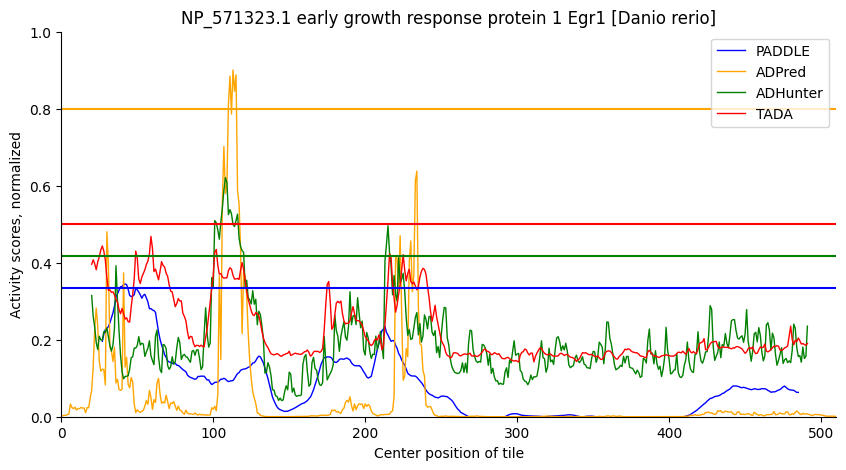

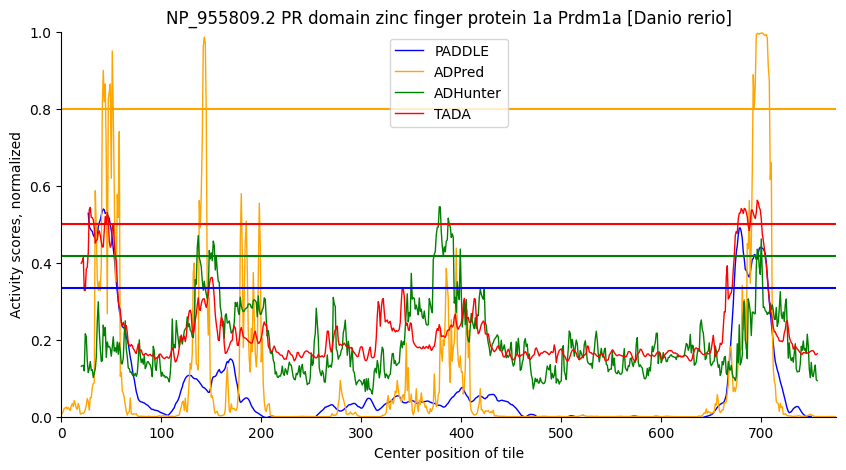

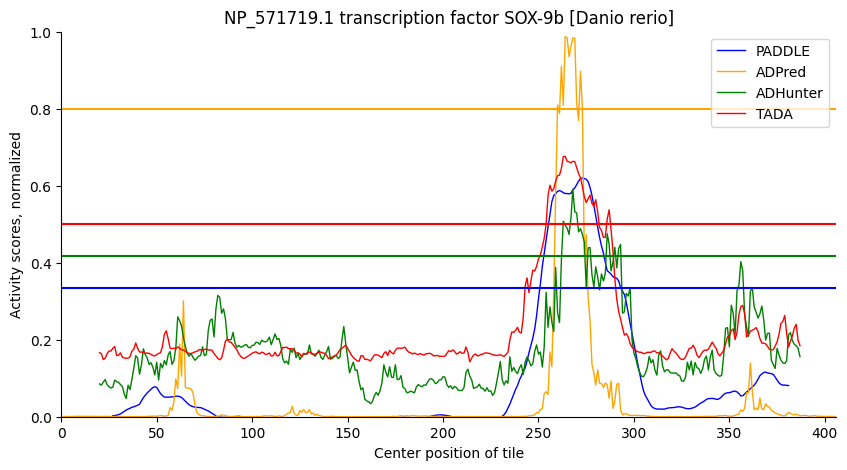

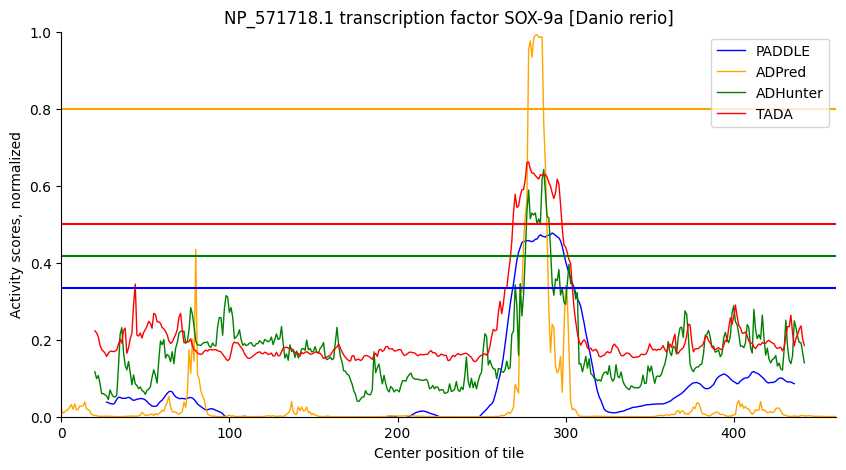

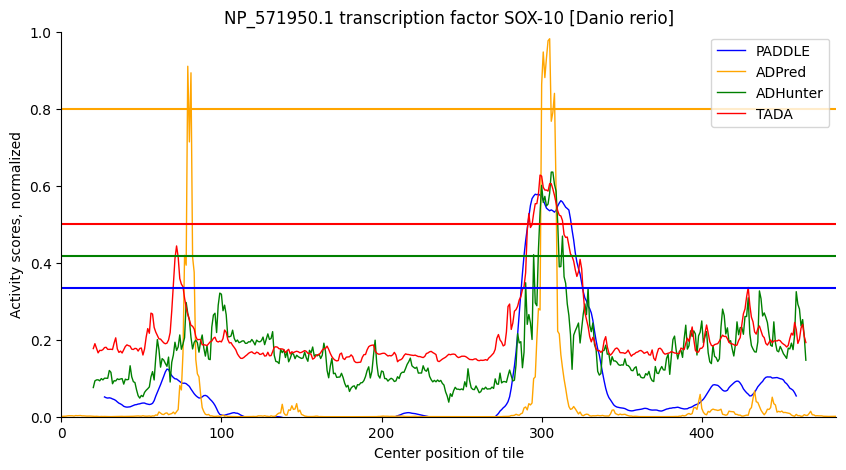

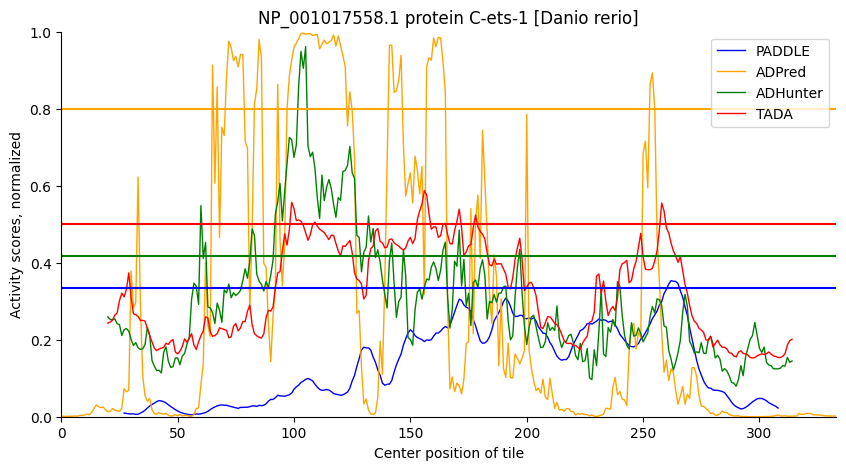

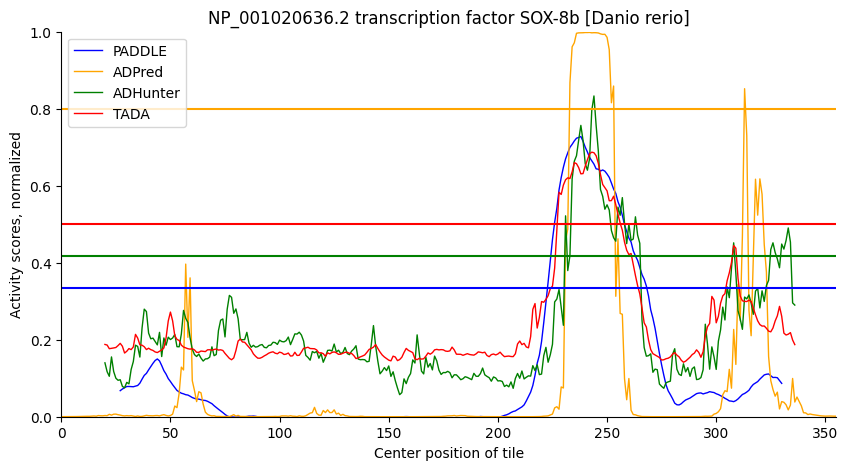

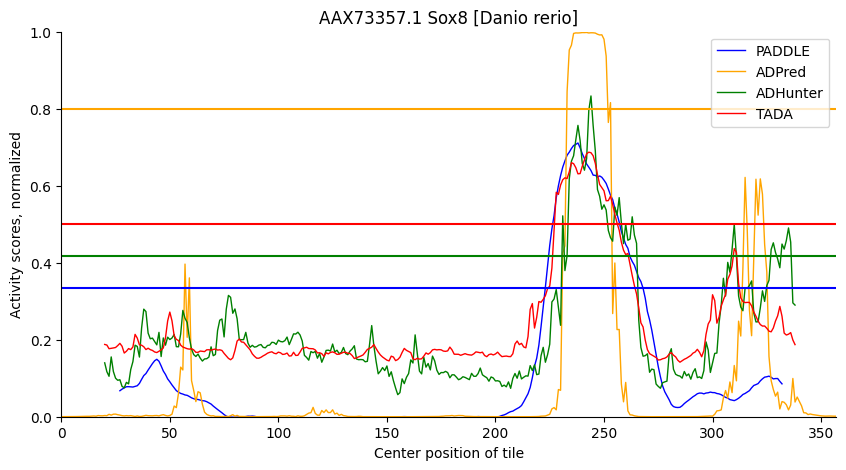

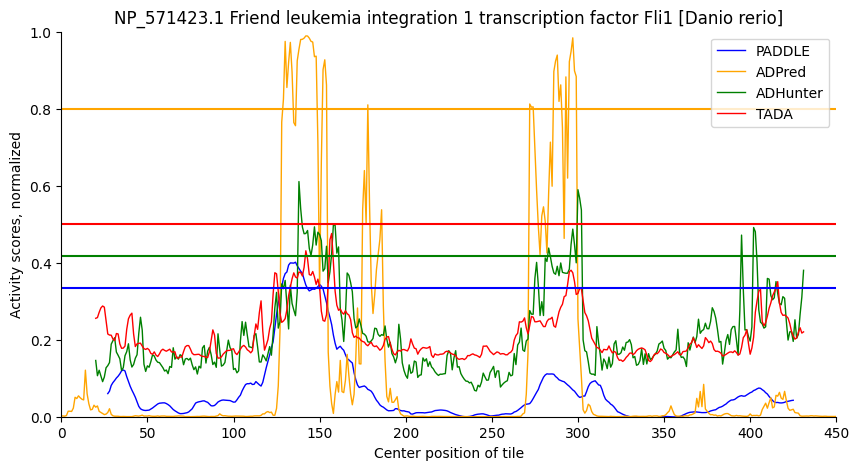

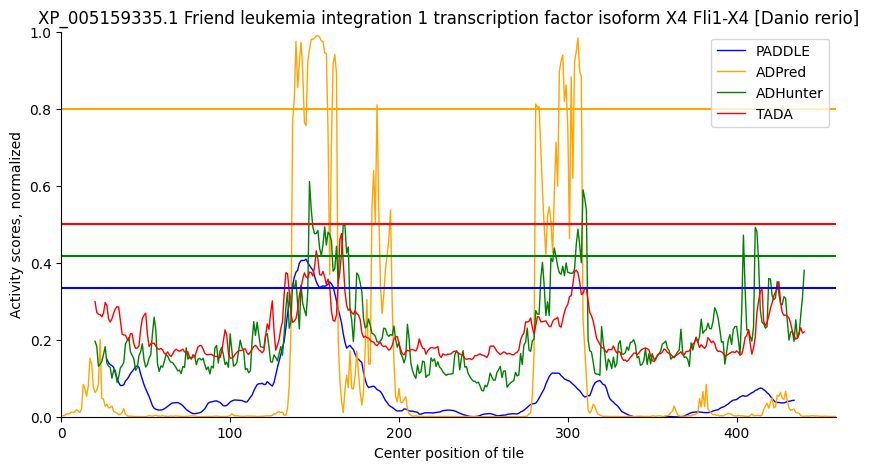

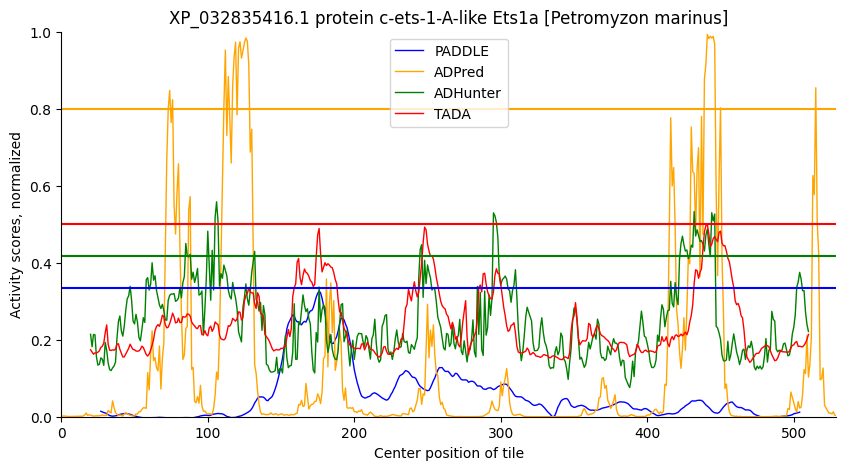

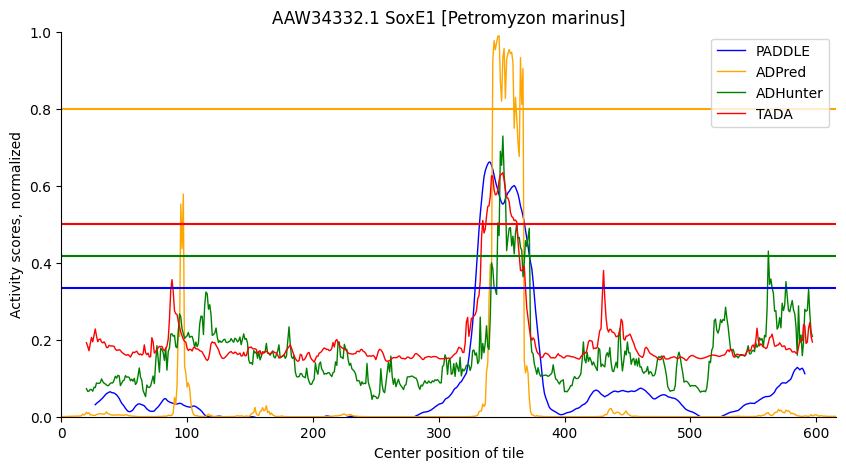

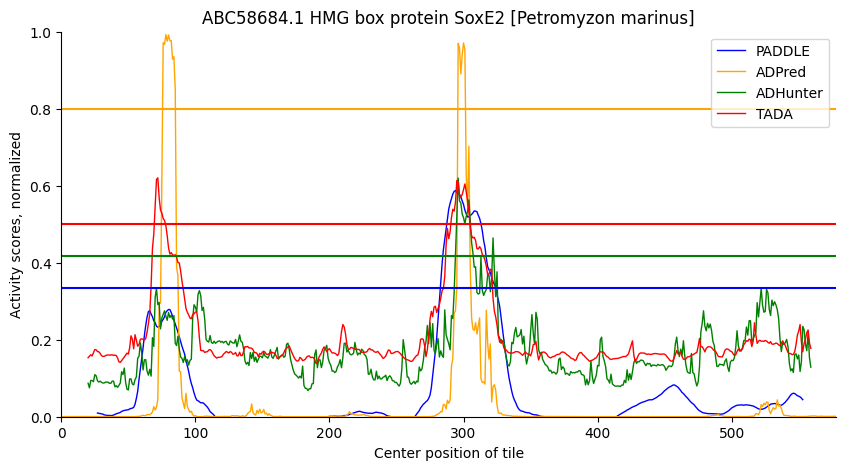

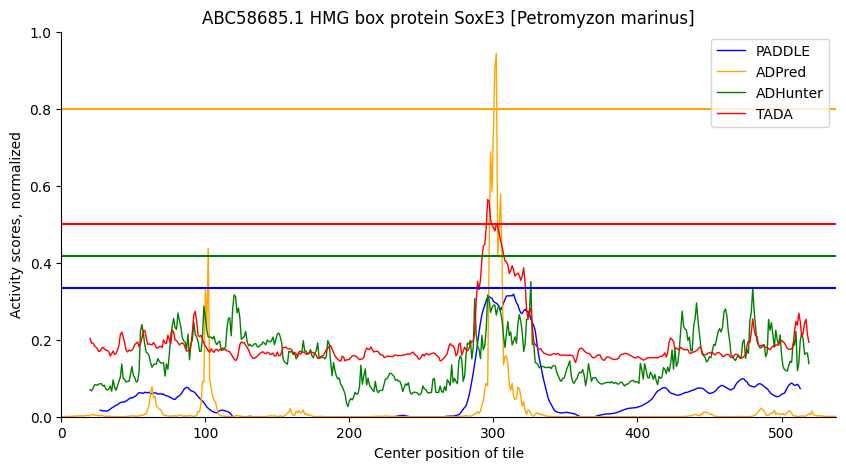

In [6]:
def normalize_paddle(arr):
    arr = np.array(arr)
    return arr/12

def normalize_adhunter(arr):
    arr = np.array(arr)
    return arr/239716
    
#pdf = matplotlib.backends.backend_pdf.PdfPages("../output/megan_TF_traces.pdf")

for i in megan_TF_preds.index:
    sequence = megan_TF_preds["sequence"].iloc[i]
    paddle_centers, paddle_preds = megan_TF_preds["paddle_centers"].iloc[i], megan_TF_preds["paddle_preds"].iloc[i]
    adpred_preds = megan_TF_preds["adpred_preds"].iloc[i]
    adhunter_centers, adhunter_preds = megan_TF_preds["adhunter_centers"].iloc[i], megan_TF_preds["adhunter_preds"].iloc[i]
    tada_centers, tada_preds = megan_TF_preds["tada_centers"].iloc[i], megan_TF_preds["tada_preds"].iloc[i]

    fig, ax = plt.subplots(figsize=(10,5))

    # Plot activity traces for all three predictors and their activity thresholds
    ax.plot(paddle_centers, normalize_paddle(paddle_preds), c='b', label='PADDLE', lw = 1)
    ax.plot(np.arange(len(sequence)), adpred_preds, c='orange', label='ADPred', lw = 1)
    ax.plot(adhunter_centers, normalize_adhunter(adhunter_preds), c='green', label='ADHunter', lw = 1)
    ax.plot(tada_centers, tada_preds, c='red', label='TADA', lw = 1)
    
    
    ax.plot([0, len(sequence)-1], [.8, .8], '-', c='orange')
    ax.plot([0, len(sequence)-1], [4/12, 4/12], '-', c='b')
    ax.plot([0, len(sequence)-1], [100000/239716, 100000/239716], '-', c='green')
    ax.plot([0, len(sequence)-1], [.5, .5], '-', c='red')

    ax.set_title(megan_TF_preds["id"].iloc[i])
    ax.legend()
    ax.set_ylim(0, 1)
    ax.margins(x=0)

    ax.set_xlabel('Center position of tile')
    ax.set_ylabel('Activity scores, normalized')

    # Plot protein sequence on a secondary x-axis
    # Comment out this block of code if it looks too messy for you
    # ax2 = ax.twiny()
    # ax2.set_xticks(np.arange(len(sequence)))
    # ax2.set_xticklabels([aa for aa in sequence], fontsize=3)

    sns.despine()

    #pdf.savefig()
    plt.show()
    
#pdf.close()

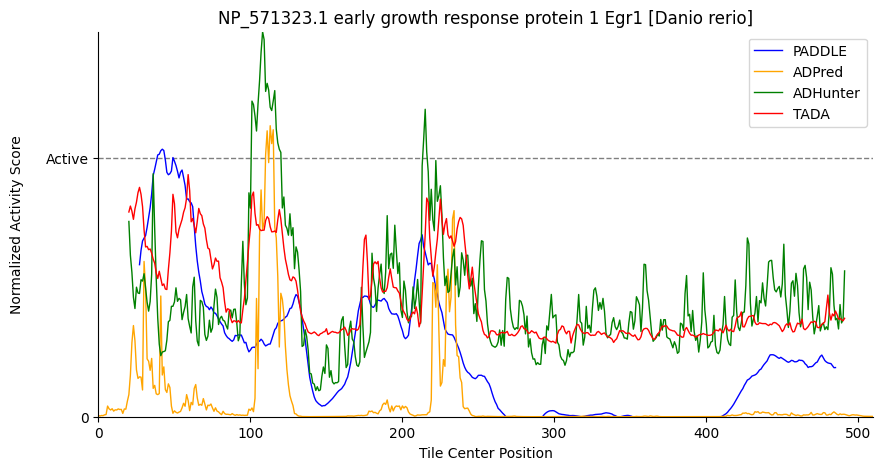

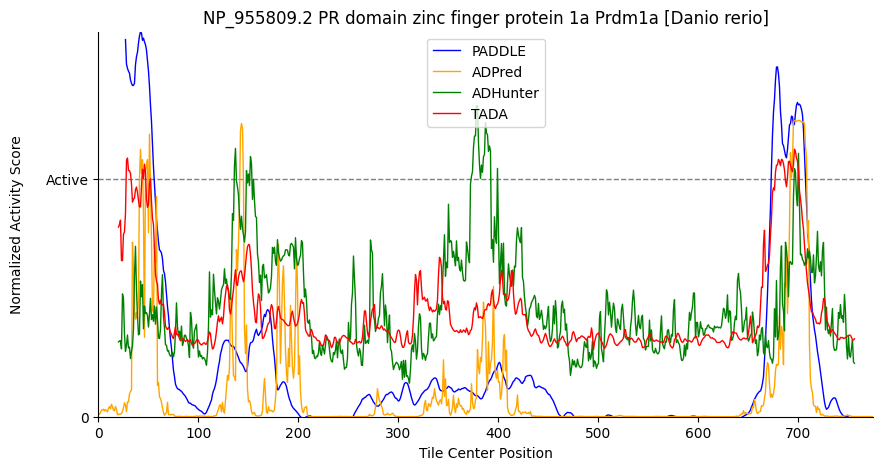

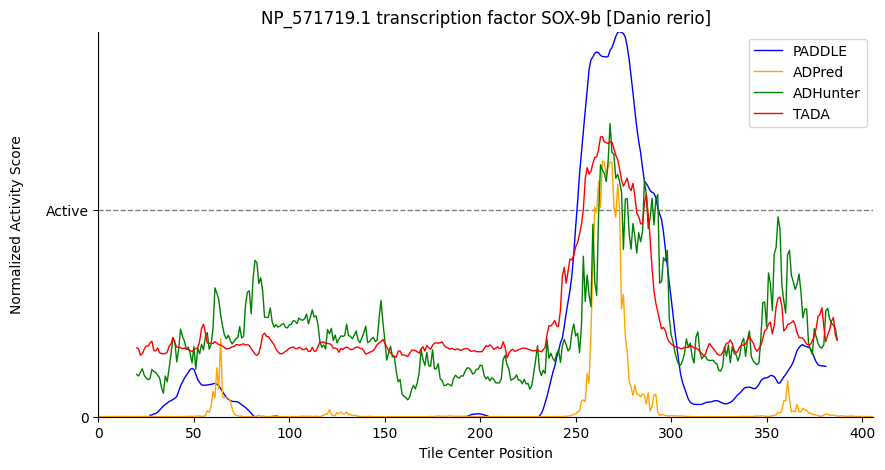

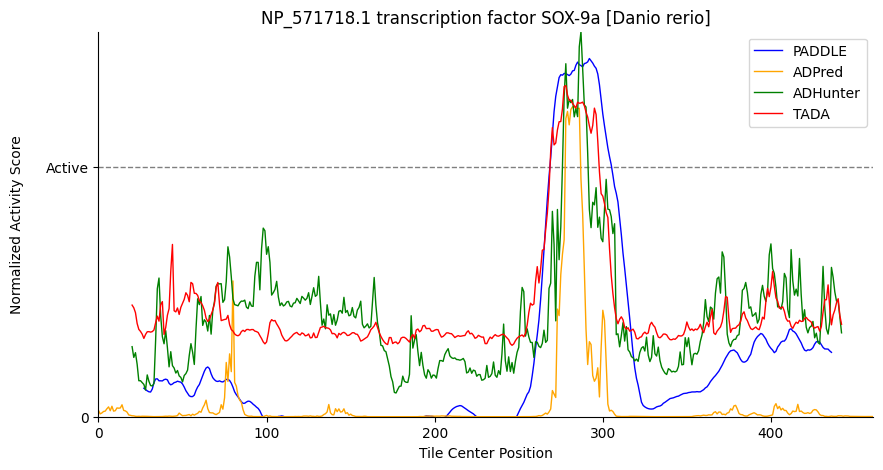

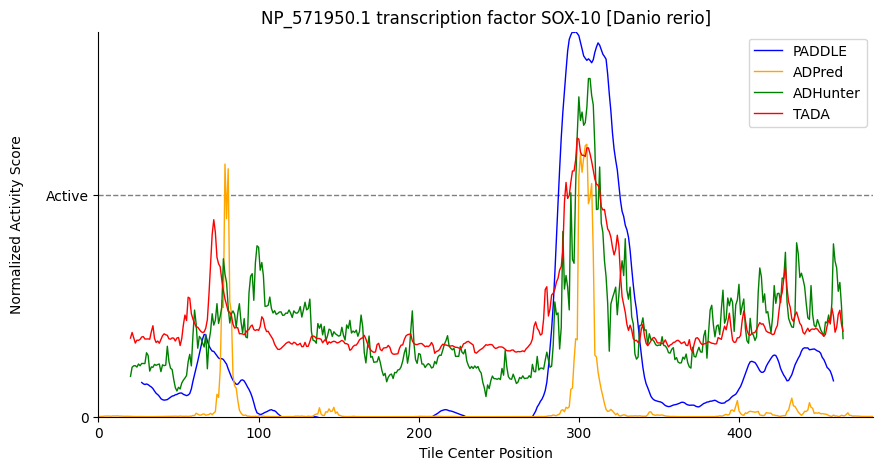

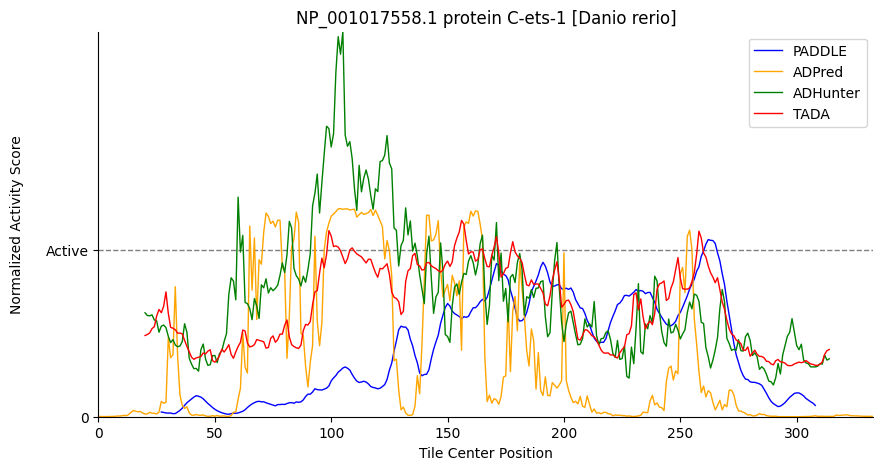

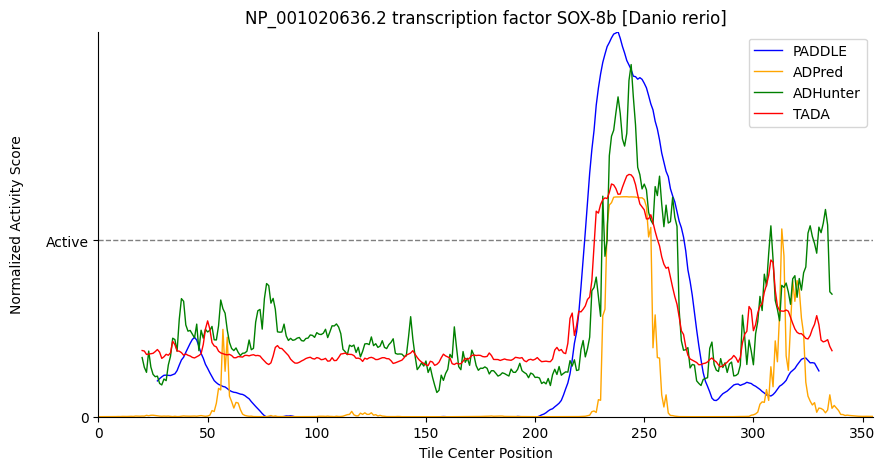

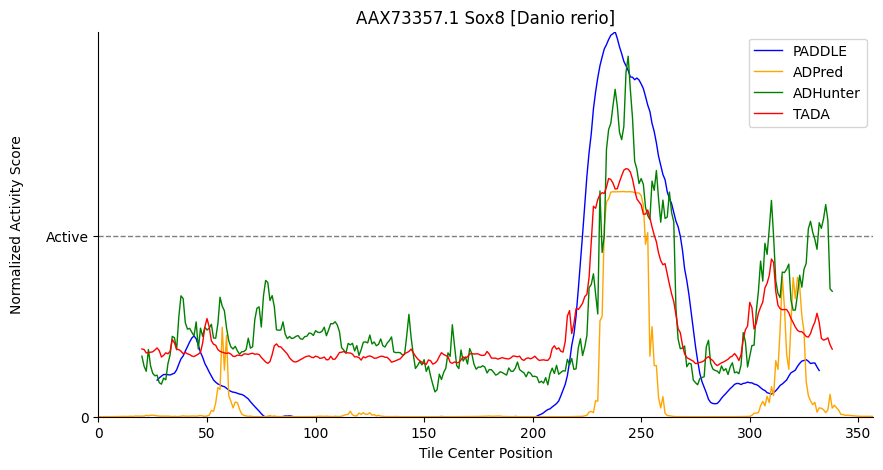

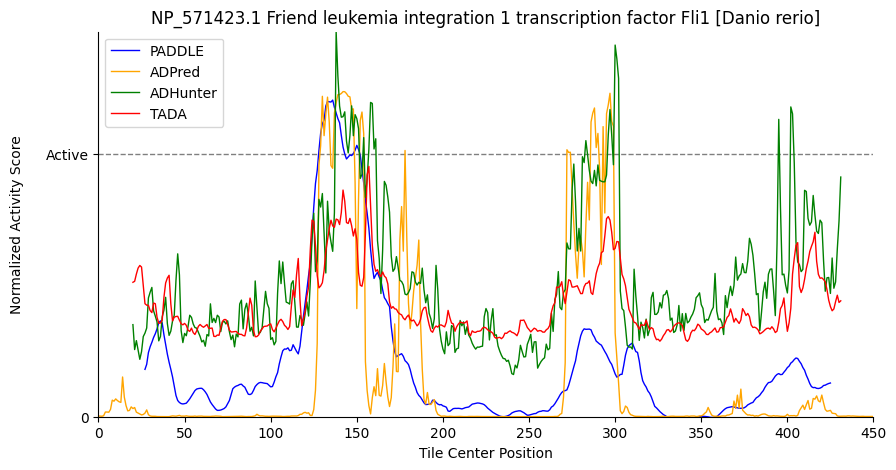

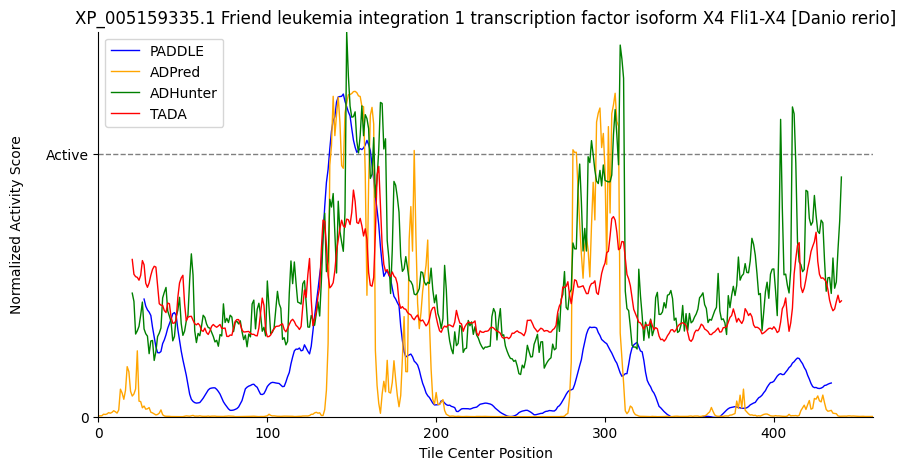

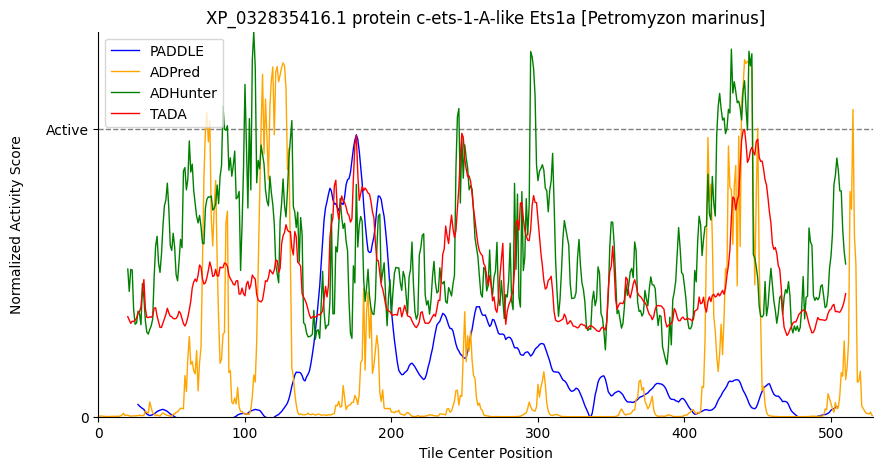

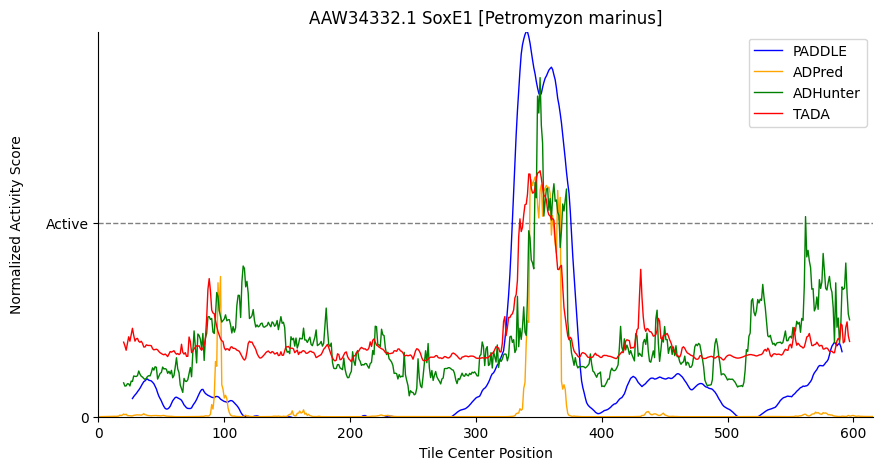

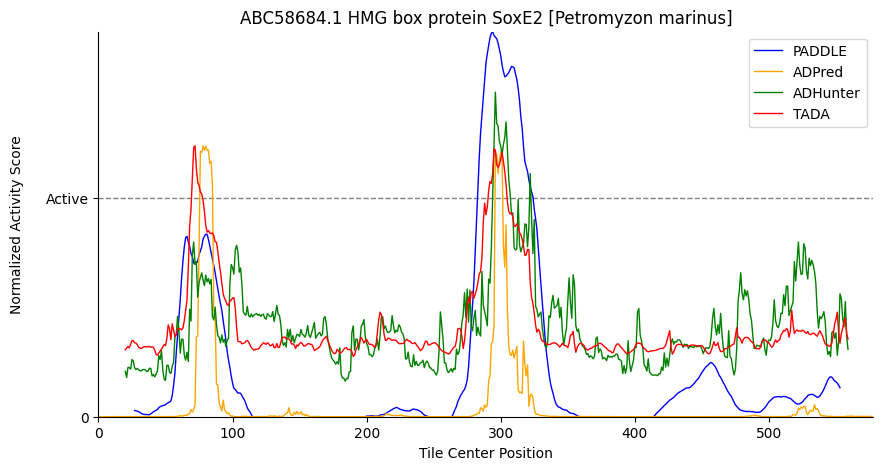

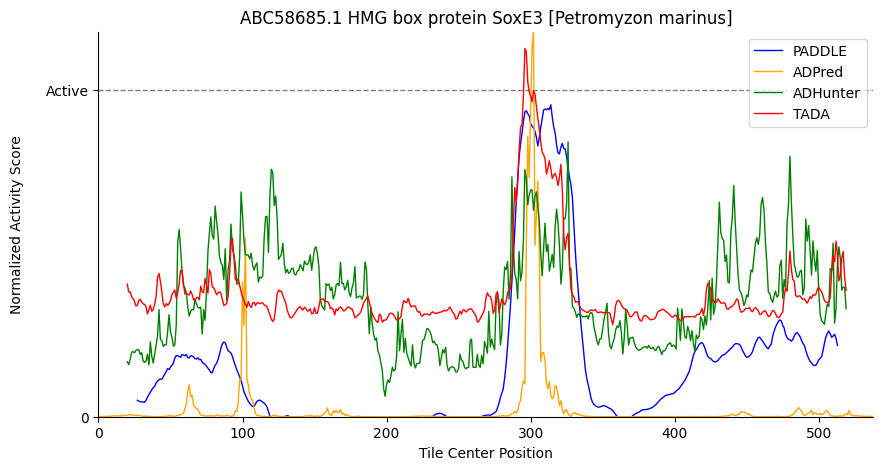

In [7]:
pdf = PdfPages("../output/megan_TF_traces.pdf")

def norm_preds(preds, threshold):
    return (np.array(preds) - threshold)
    
for i in megan_TF_preds.index:
    sequence = megan_TF_preds["sequence"].iloc[i]
    paddle_centers, paddle_preds = megan_TF_preds["paddle_centers"].iloc[i], megan_TF_preds["paddle_preds"].iloc[i]
    adpred_preds = megan_TF_preds["adpred_preds"].iloc[i]
    adhunter_centers, adhunter_preds = megan_TF_preds["adhunter_centers"].iloc[i], megan_TF_preds["adhunter_preds"].iloc[i]
    tada_centers, tada_preds = megan_TF_preds["tada_centers"].iloc[i], megan_TF_preds["tada_preds"].iloc[i]

    fig, ax = plt.subplots(figsize=(10,5))

        # Normalizing all to 0.8
    # ax.plot([0, len(sequence)-1], [.8, .8], '-', c='orange')
    # ax.plot([0, len(sequence)-1], [4/5, 4/5], '-', c='b')
    # ax.plot([0, len(sequence)-1], [100000/125000, 100000/125000], '-', c='green')
    # ax.plot([0, len(sequence)-1], [.5 / 0.625, .5 / 0.625], '-', c='red')
    ax.plot([0, len(sequence)-1], [.8, .8], '--', c='black', alpha = 0.5, lw = 1)



    # Plot activity traces for all three predictors and their activity thresholds
    ax.plot(paddle_centers, np.array(paddle_preds) / 5, c='b', label='PADDLE', lw = 1)
    ax.plot(np.arange(len(sequence)), adpred_preds, c='orange', label='ADPred', lw = 1)
    ax.plot(adhunter_centers, np.array(adhunter_preds) / 125000, c='green', label='ADHunter', lw = 1)
    ax.plot(tada_centers, np.array(tada_preds) / 0.625, c='red', label='TADA', lw = 1)

    max_val = max(
        np.max(np.array(paddle_preds) / 5),
        np.max(adpred_preds),
        np.max(np.array(adhunter_preds) / 125000),
        np.max(np.array(tada_preds) / 0.625)
    )


    ax.set_title(megan_TF_preds["id"].iloc[i])
    ax.legend()
    ax.set_ylim(0, max_val)
    ax.margins(x=0)

    ax.set_xlabel('Tile Center Position')
    ax.set_ylabel('Normalized Activity Score\n')

    ax.set_yticks([0, 0.8])         # Only show the x-axis tick at 0
    ax.set_yticklabels([0, 'Active'])
    
    # Plot protein sequence on a secondary x-axis
    # Comment out this block of code if it looks too messy for you
    # ax2 = ax.twiny()
    # ax2.set_xticks(np.arange(len(sequence)))
    # ax2.set_xticklabels([aa for aa in sequence], fontsize=3)

    sns.despine()

    pdf.savefig()
    plt.show()
    
pdf.close()

In [8]:
my_predictor = py_predictor.Predictor("../../AD_predictor_project/Paper_AD_predictor/AD_predictor/output/parrot_lambert_tf_aggreg_preds_output", 
                                                dtype="residues")

In [9]:
len(megan_TF_preds)

14

In [11]:
def norm_preds(preds, threshold):
    return (np.array(preds) - threshold)

def plot_fish_TFs(my_predictor):
    fig, axs = plt.subplots(3, 5, figsize = (13, 6), sharey = True, dpi = 300)
    axs = axs.flatten()

    for i in megan_TF_preds.index:
        ax = axs[i]

        sequence = megan_TF_preds["sequence"].iloc[i]
        paddle_centers, paddle_preds = megan_TF_preds["paddle_centers"].iloc[i], megan_TF_preds["paddle_preds"].iloc[i]
        adpred_preds = megan_TF_preds["adpred_preds"].iloc[i]
        adhunter_centers, adhunter_preds = megan_TF_preds["adhunter_centers"].iloc[i], megan_TF_preds["adhunter_preds"].iloc[i]
        tada_centers, tada_preds = megan_TF_preds["tada_centers"].iloc[i], megan_TF_preds["tada_preds"].iloc[i]

        
        ax.plot([0, len(sequence)-1], [.8, .8], '--', c='black', alpha = 0.5, lw = 1)

        # Plot activity traces for all three predictors and their activity thresholds
        ax.plot(paddle_centers, np.array(paddle_preds) / 5, c='b', label='PADDLE', lw = 1, alpha = 0.35)
        ax.plot(np.arange(len(sequence)), adpred_preds, c='orange', label='ADPred', lw = 1, alpha = 0.35)
        ax.plot(adhunter_centers, np.array(adhunter_preds) / 125000, c='green', label='ADHunter', lw = 1, alpha = 0.35)
        ax.plot(tada_centers, np.array(tada_preds) / 0.625, c='red', label='TADA', lw = 1, alpha = 0.35)

        ax2 = ax.twinx()
        ax2.plot(my_predictor.predict(sequence), label = "Consensus", lw = 2)
        ax2.set_ylim(-0.1, 1.1)

        max_val = max(
            np.max(np.array(paddle_preds) / 5),
            np.max(adpred_preds),
            np.max(np.array(adhunter_preds) / 125000),
            np.max(np.array(tada_preds) / 0.625)
        )


        ax.set_title(megan_TF_preds["id"].iloc[i].split(" ")[-3]+"\n"+" ".join(megan_TF_preds["id"].iloc[i].split(" ")[-2:]), fontsize = "xx-small", y = 0.8)
        #ax.legend()
        #ax.set_ylim(0, max_val)
        ax.margins(x=0)

        ax.set_xlabel('')
        ax.set_ylabel(' ')
        ax2.set_ylabel(" ")

        ax.set_yticks([])         # Only show the x-axis tick at 0
        #ax.set_yticklabels([0, 'Active'], rotation = 0)
        

        sns.despine()

        #plt.show()

    axs[-1].set_visible(False)
    #plt.tight_layout(pad = 0)

    plt.suptitle("Megan Fish TFs: Consensus Predictions", y = 0.95)

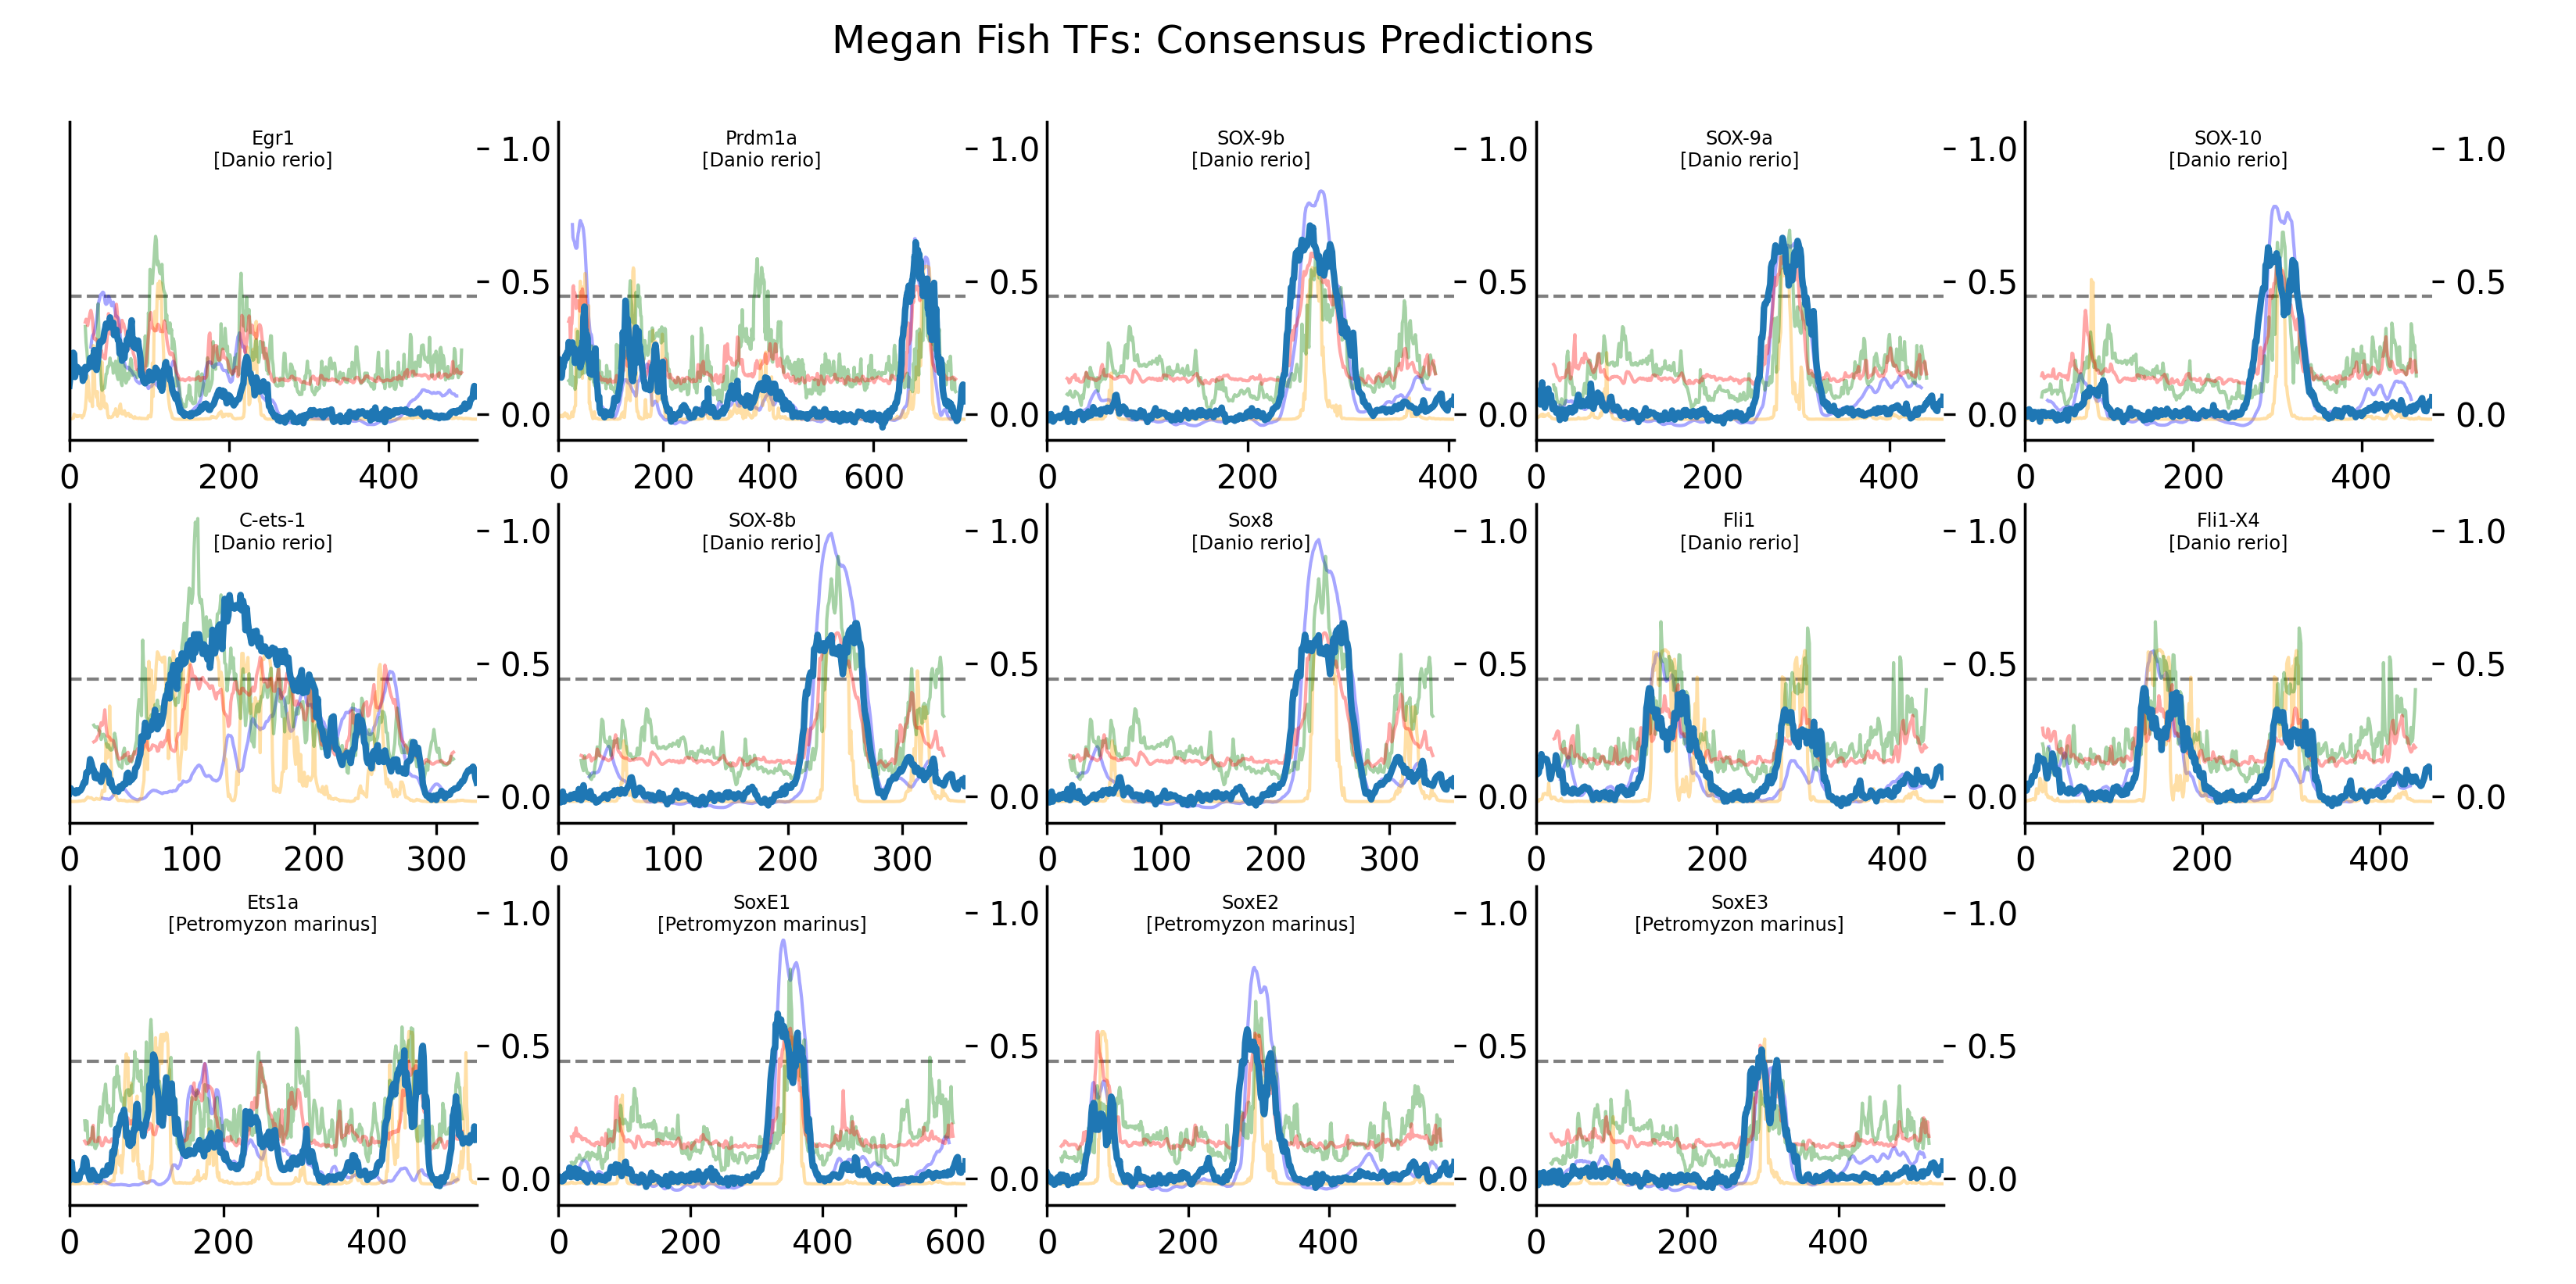

In [13]:
plot_fish_TFs(my_predictor)

In [14]:
human_yeast_predictor = py_predictor.Predictor("../../consensus_predictor/output/parrot_human_yeast_aggreg", 
                                                dtype="residues")

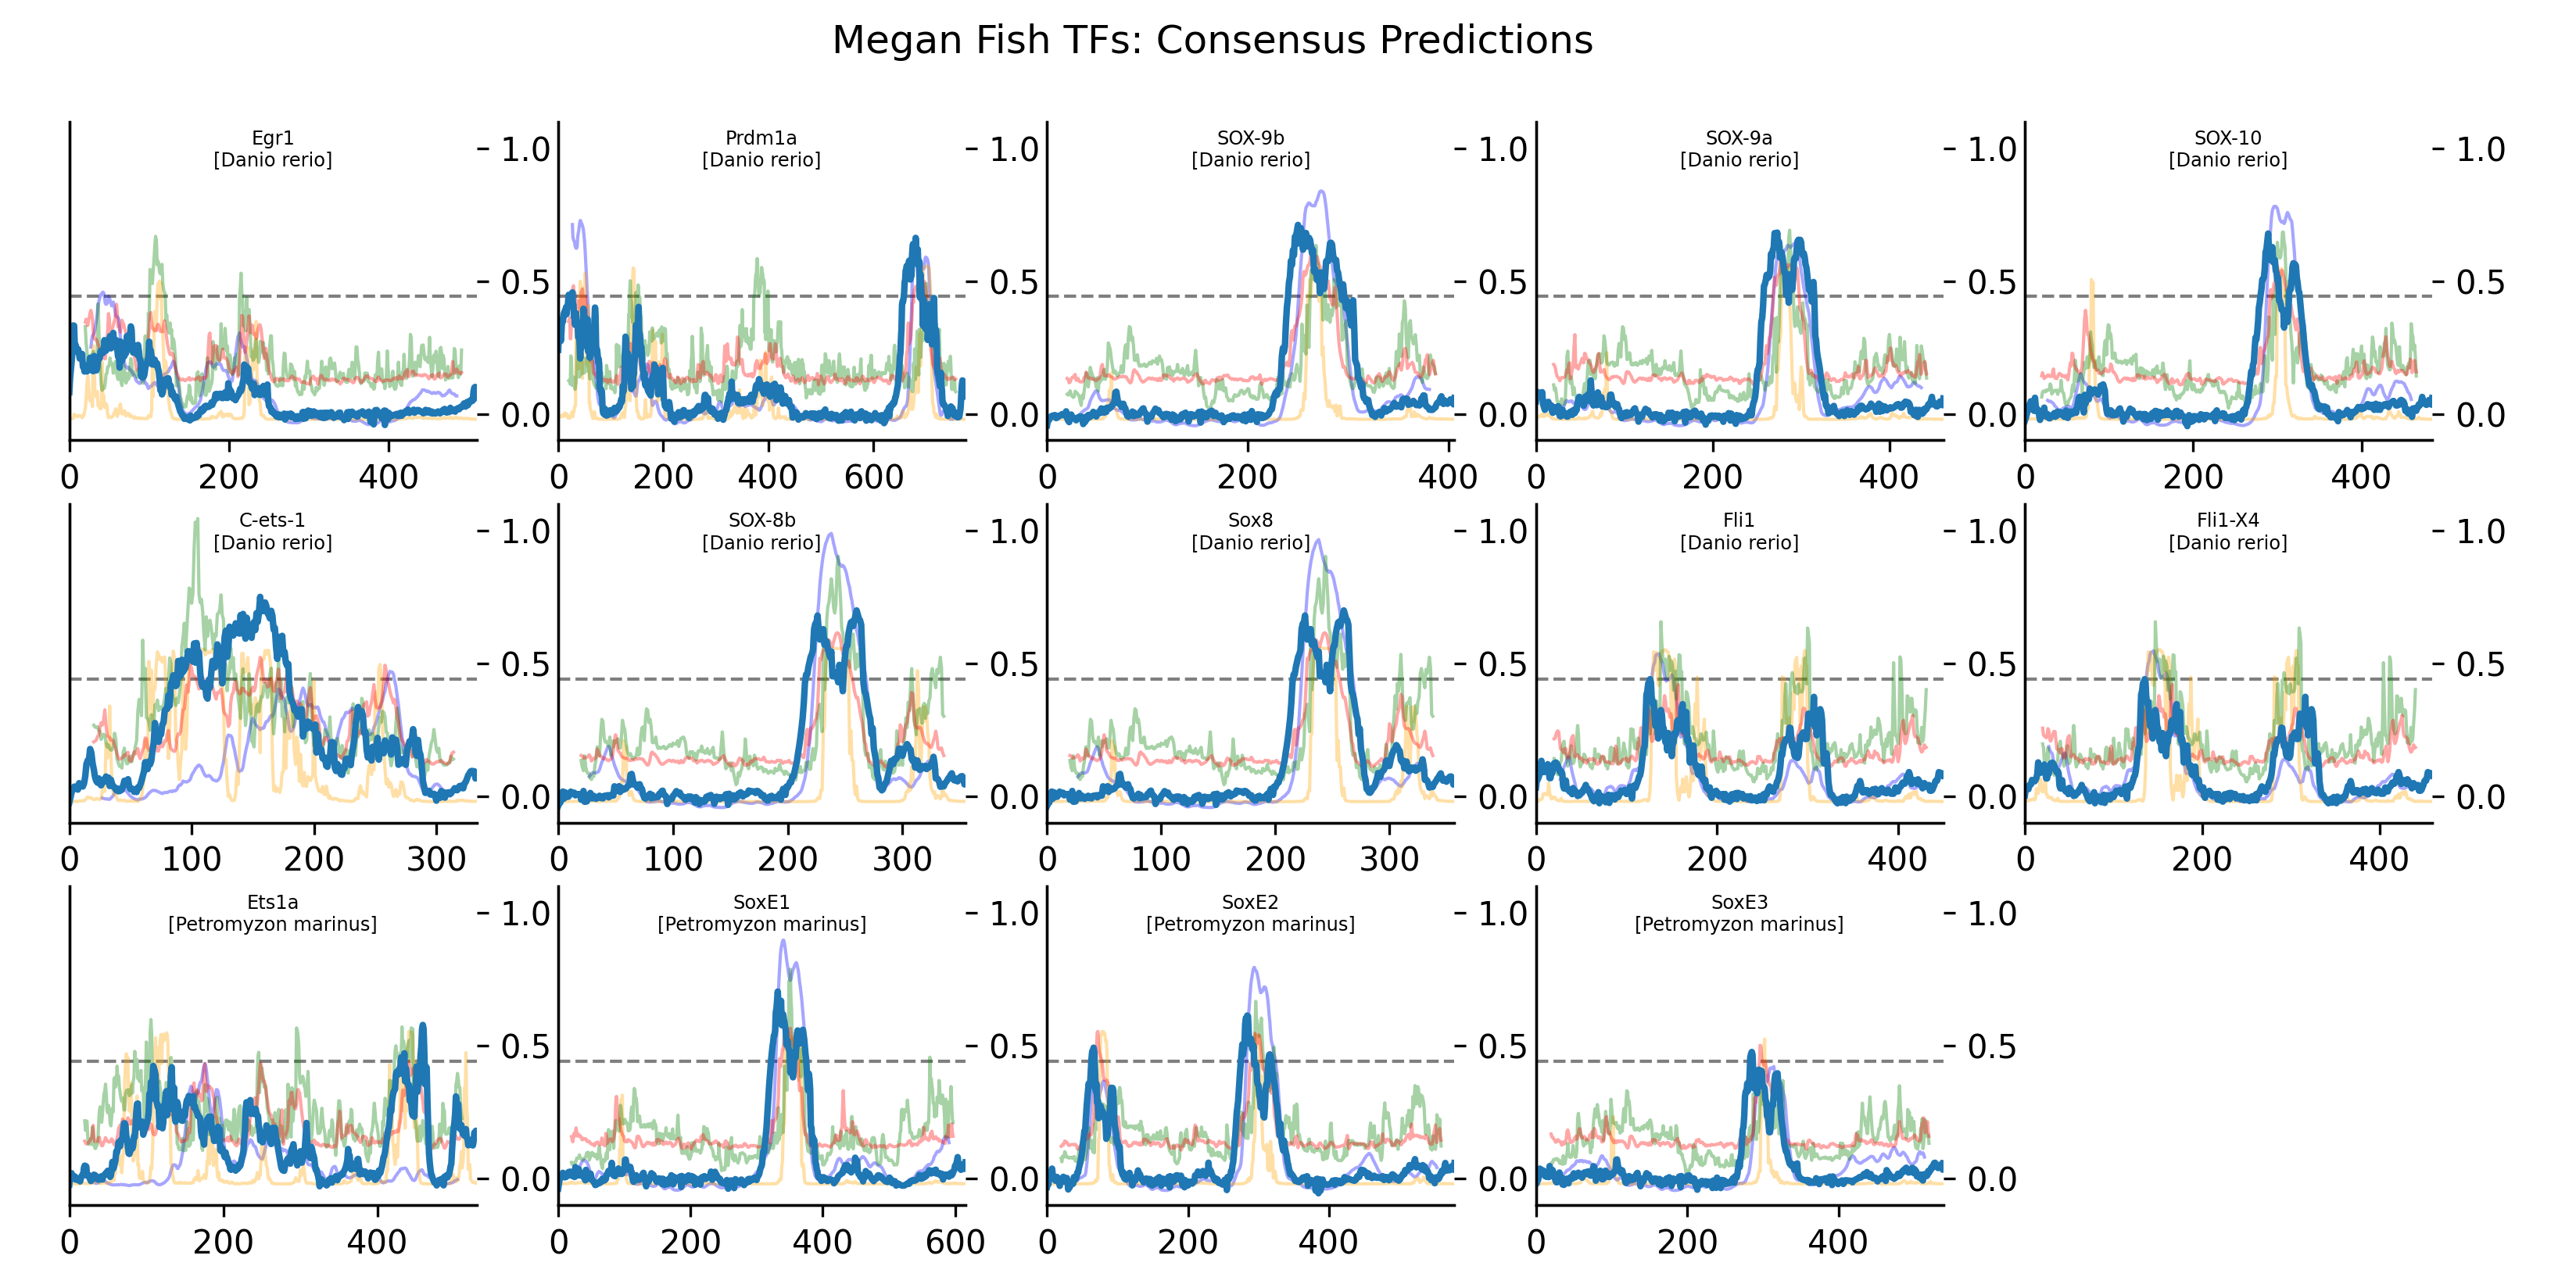

In [15]:
plot_fish_TFs(human_yeast_predictor)